# 03 Example: Linear Frame Analysis
___

## Setup
import all the needed libraries and files.

In [1]:
import numpy as np

from Structure import *
from Solver import *

from Plotting_Functions import *

## Generate the Geometry and the corresponding mesh

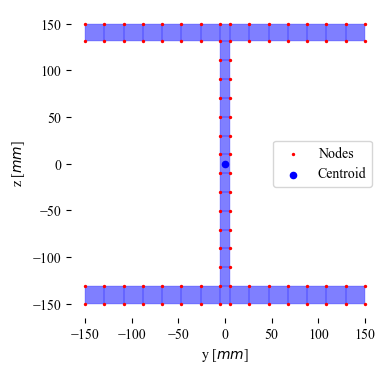

╒════════════════════╤═══════════════╕
│ Mesh Type          │ quadrilateral │
├────────────────────┼───────────────┤
│ Number of elements │ 43            │
├────────────────────┼───────────────┤
│ Number of nodes    │ 88            │
├────────────────────┼───────────────┤
│ Cross Section Area │ 14282.00      │
╘════════════════════╧═══════════════╛
╒══════════════════════════╤══════════╤══════════╕
│                          │ y        │ z        │
╞══════════════════════════╪══════════╪══════════╡
│ Centroid [mm]            │ 0.00     │ 0.00     │
├──────────────────────────┼──────────┼──────────┤
│ Moment of inertia [mm^4] │ 2.42e+08 │ 8.55e+07 │
╘══════════════════════════╧══════════╧══════════╛


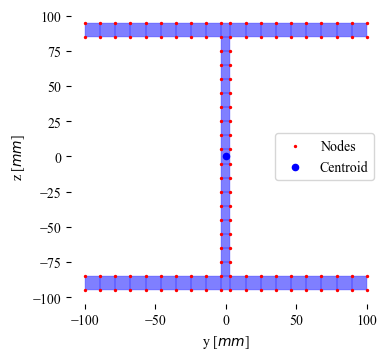

In [2]:
# Initalize the geometry of the columns
HEB_300 = H_beam(web_width     =  11.0,
                 web_height    = 262.0,
                 flange_width  = 300.0,
                 flange_height =  19.0)

# Create the mesh of the column
column = Mesh(HEB_300, mesh_type="quadrilateral", mesh_size=20)

# Print and plot the mesh of the column
column.plot()
column.print()

# Initalize the geometry of the horizontal beam
HEA_200 = H_beam(web_width     =   6.5,
                 web_height    = 170.0,
                 flange_width  = 200.0,
                 flange_height =  10.0)

beam = Mesh(HEA_200, mesh_type="quadrilateral", mesh_size=10)
beam.plot()

## Structure
Initialize the structure. For a frame, one has to define the columns and the beams geometry, the number of storeys, their width and height as well as the DOF where nodal loads will be applied and their value. 

Each node has 6 DOFs (counting starts from 0). The nodes start counting on the bottom left (0), then bottom right (1), then one storey up on the left side (2) and so on. To apply a lateral load we need the first DOF (global x-direction) of the node number 2, so therefore DOF n*6 = 2*6 = 12.

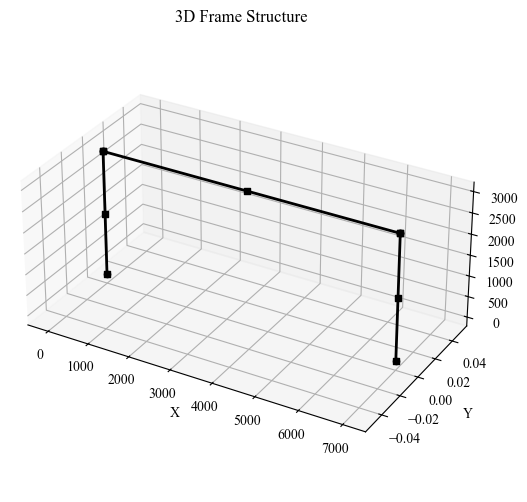

In [3]:
frame = Frame(column            = column, 
			  beam              = beam, 
			  number_of_stories = 1, 
			  story_height      = 3000, 
			  story_width       = 7000,
			  load_DOFs         = [12],
			  nodal_loads       = [100000],
			  number_of_sections_per_element = 3)

plot_initial_structure(frame)

## Solver

In [4]:
lin_solver = Linear(frame)

--------------------------------------
Node 0
          Displacement
u [mm]        0.000000
v [mm]        0.000000
w [mm]        0.000000
θx [rad]      0.000000
θy [rad]      0.000000
θz [rad]      0.000000
          Internal Force
Fx [kN]       -50.983094
Fy [kN]         0.000000
Fz [kN]        -5.823099
Mx [kNm]       -0.000000
My [kNm]     -132.405234
Mz [kNm]        0.000000
--------------------------------------
Node 1
          Displacement
u [mm]        0.000000
v [mm]        0.000000
w [mm]        0.000000
θx [rad]      0.000000
θy [rad]      0.000000
θz [rad]      0.000000
          Internal Force
Fx [kN]       -49.016906
Fy [kN]        -0.000000
Fz [kN]         5.823099
Mx [kNm]       -0.000000
My [kNm]     -126.833077
Mz [kNm]        0.000000
--------------------------------------
Node 2
          Displacement
u [mm]        7.226855
v [mm]        0.000000
w [mm]        0.005825
θx [rad]     -0.000000
θy [rad]      0.003310
θz [rad]     -0.000000
          Internal Force
Fx [

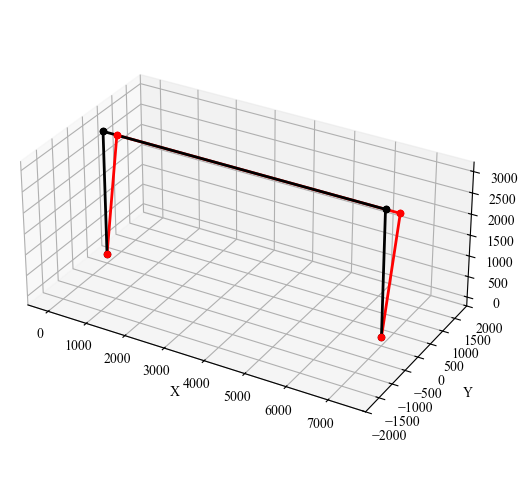

In [5]:
lin_solver.solve()
plot_displaced_structure(lin_solver, scale=50.0)